In [190]:
%pylab inline

from numpy.random import seed
from numpy.random import rand
from scipy.stats import sem

Populating the interactive namespace from numpy and matplotlib


In [151]:
BetaJ = abs(randn(15))  #\beta J
                       #number of spin

In [557]:
N = 350

In [449]:
BetaJ_n = []
for i in range(len(BetaJ)):
    BetaJ_n.append(round(BetaJ[i],2))

In [450]:
#Energy
def E(spinek):
    s = 0
    for i in range(1, len(spinek)):
        s = s + spinek[i-1] * spinek[i]
    E = -s
    return E

In [451]:
#\Delta Energy
def dE(s0 ,s1, s2):
    return 2 * s1* (s0 + s2)

In [452]:
def Leptetes(s, N, BetaJ):
    rand = random.randint(0, N) #we get one spin at random
    
    #Spec.: if we got the first unfortunately
    if rand == 0:
        s1 = s[rand]
        s0 = s[N-1]
        s2 = s[rand+1]
    
    #Spec.: if we got the last unfortunately
    if rand == N-1:
        s1 = s[rand]
        s0 = s[rand-1]
        s2 = s[0]
    else:
        s0 = s[rand-1]
        s1 = s[rand]
        s2 = s[rand+1]
    
    #If \Delta E is negativ, we flip the spint
    if dE(s0, s1, s2) < 0:
        s[rand]= -s[rand]
        return s
    
    #If \Delta E 0, from P=[0,1] random number, if smaler than 0.5, flip the spin
    elif dE(s0, s1, s2) == 0:
        P = random.random()
        if P < 0.5:
            s[rand]= -s[rand]
            return s
        else:
            return s
    
    #If dE>0, P=[0,1], if P < exp(...) flip the spin, otherwise not
    else: 
        P = random.random()
        if P < exp(-BetaJ * dE(s0, s1, s2)):
            s[rand] = -s[rand]
            return s
        else:
            return s

In [548]:
mtrx = np.empty((4*len(BetaJ),3))

In [584]:
for k in range(0,4*len(BetaJ)-3,1):

    s = (random.randint(0, 2, (N,)) -1/2) * 2   #We set the spins randomly 1 or -1
    #s = numpy.zeros(N) + 1                     #we start all spin from +1
    t = 20                    #the time
    m = np.empty((len(BetaJ),N*t))                                      #average of spin = m 

    for j in range(0,4,1):
        sFrissitett = s

        for i in range(N*t):
            s = sFrissitett
            m[j,i] = (sum(s) / N)    
            sFrissitett = Leptetes(s, N, BetaJ[j])

        for i in range(0,4,1):        
            mtrx[i+k,0] = m[i,N*t-1]
            mtrx[i+k,1] = average(m[i,:])
            mtrx[i+k,2] = (average(m[i,:]*m[i,:]) - average(m[i,:])*average(m[i,:]))

In [585]:
mean_m_std = []
mean_m = []
for i in range(0,4*len(BetaJ),4):
    mean_m.append(mean(mtrx[0+i:3+i,0]))
    mean_m_std.append(sem(mtrx[0+i:3+i,0]))

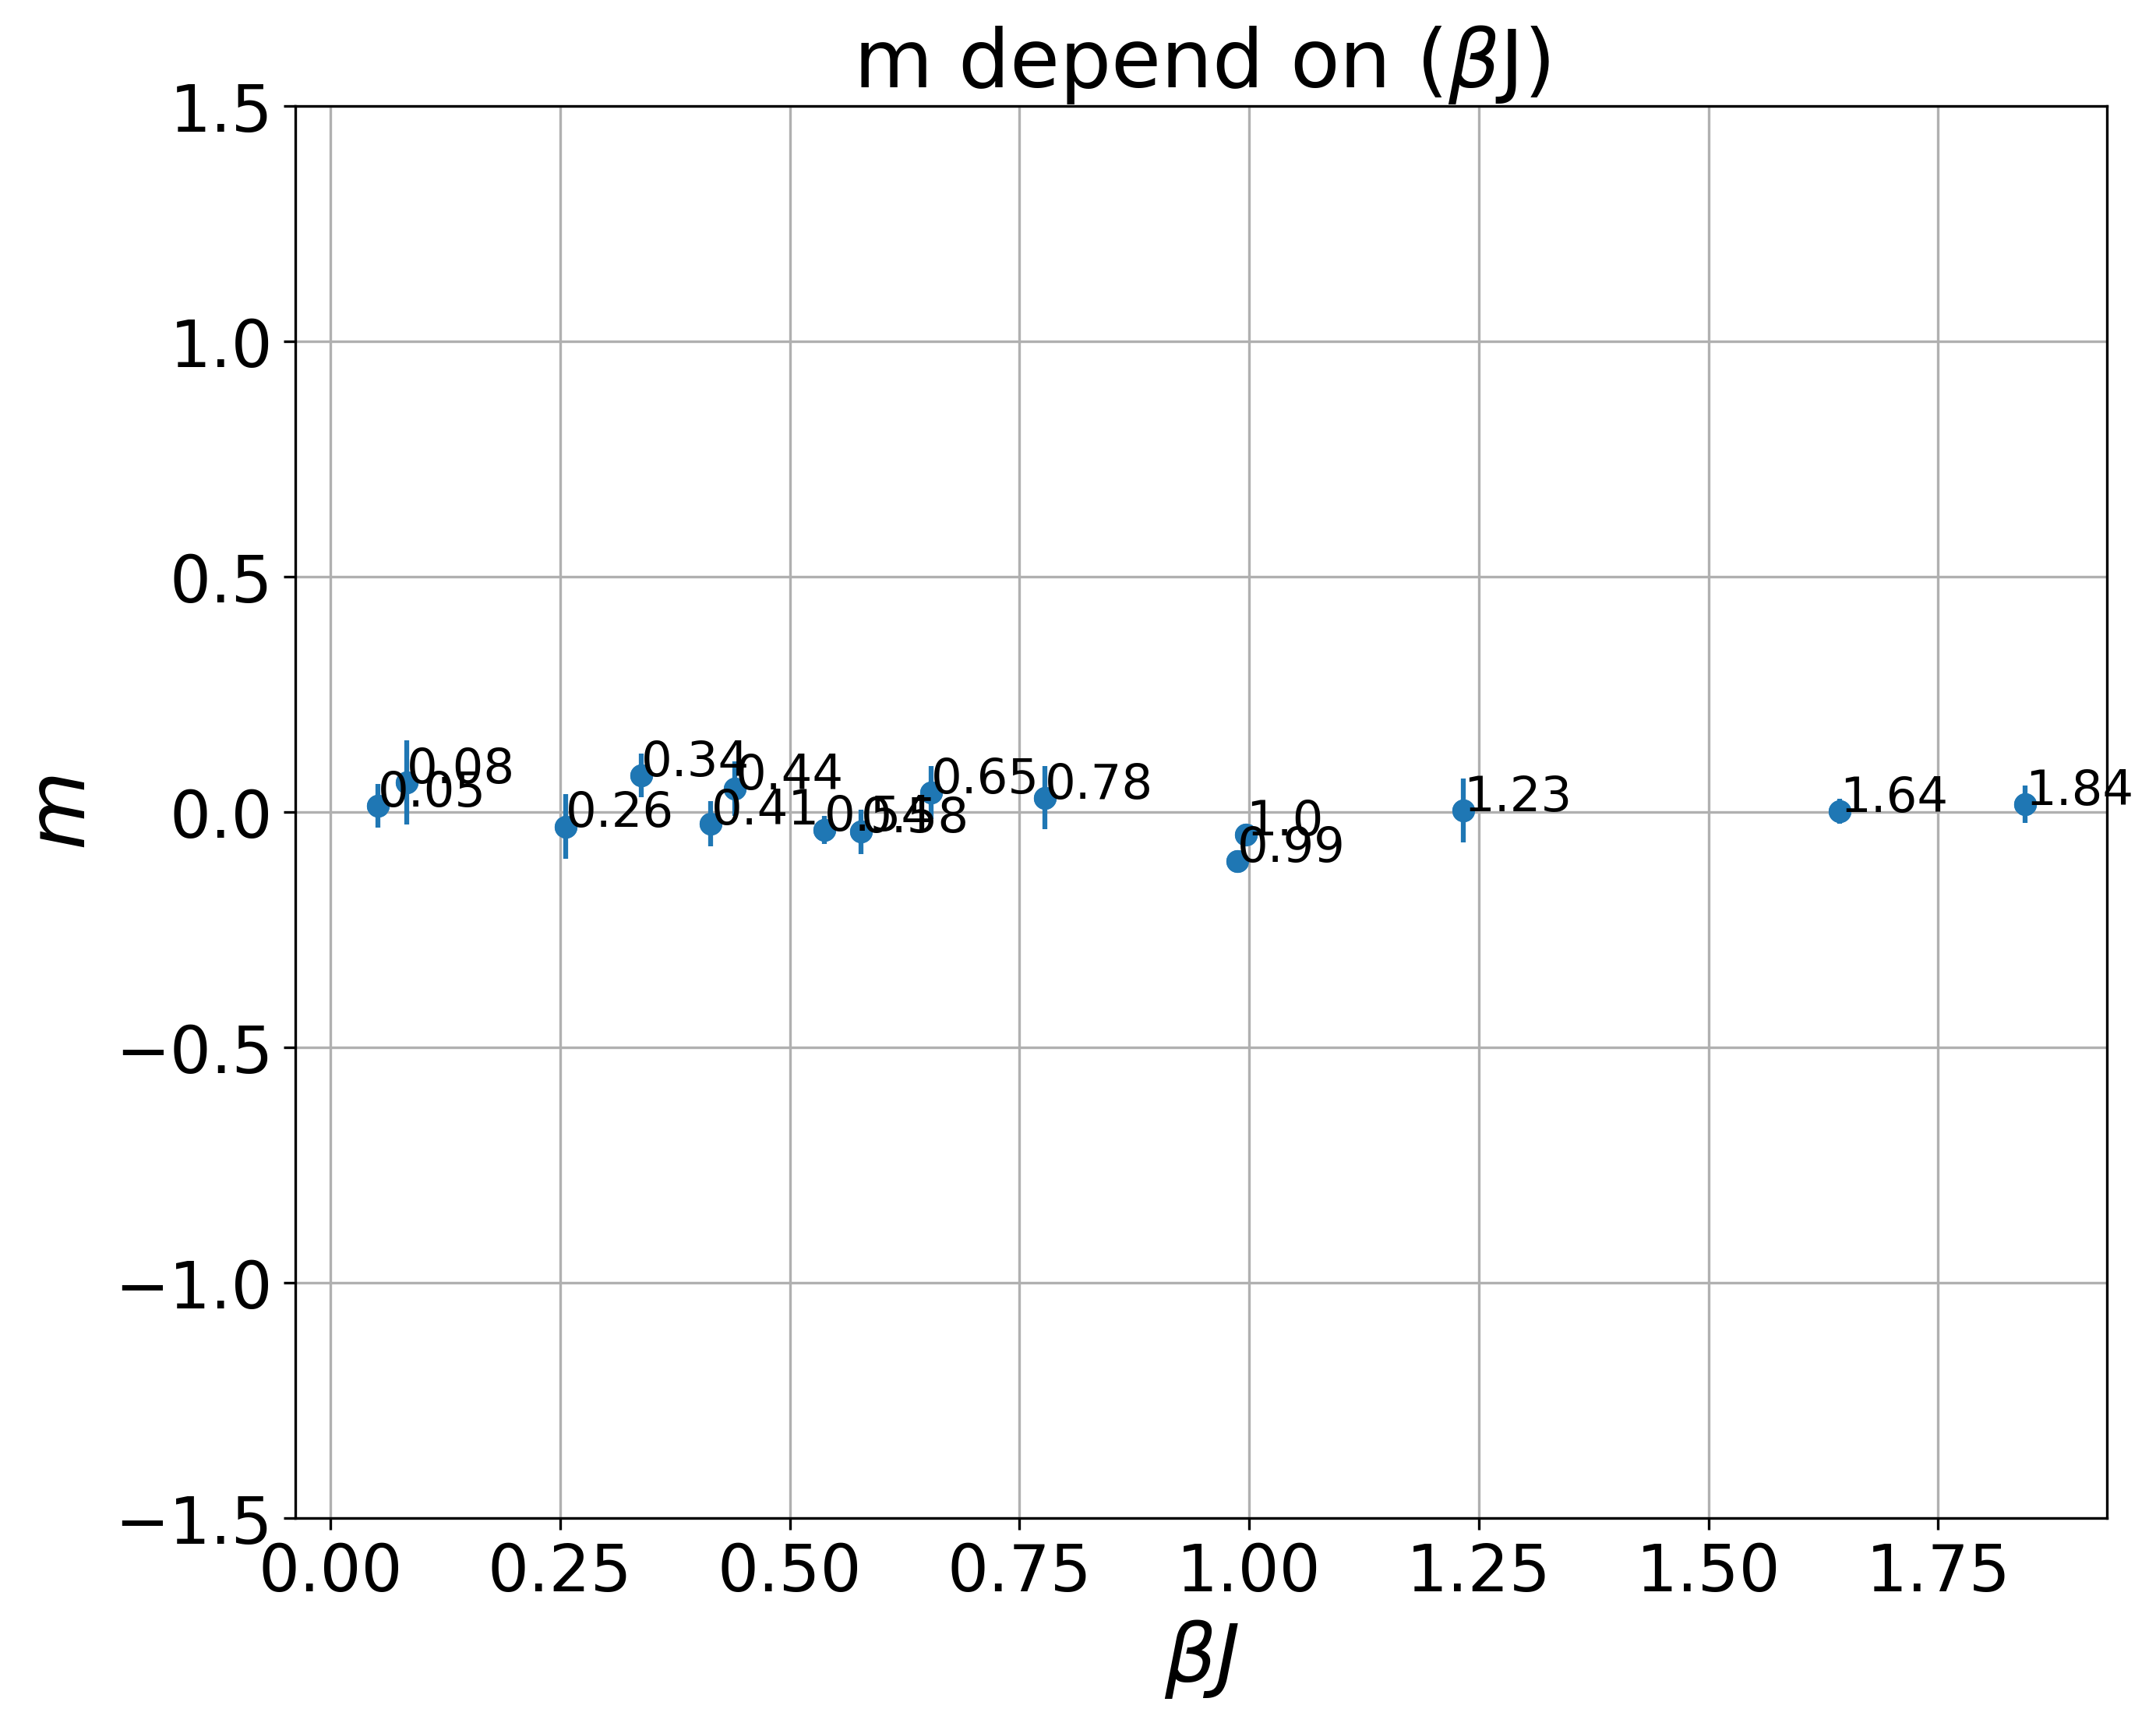

In [586]:
fig, ax = subplots(figsize=(10, 8), dpi=300, facecolor='w', edgecolor='r')
ax.scatter(BetaJ, mean_m)  

for i, txt in enumerate(BetaJ_n):
    ax.annotate(txt, (BetaJ[i], mean_m[i]), fontsize=15)
    
errorbar(BetaJ, mean_m, mean_m_std, linestyle='',marker='o')
xlabel(r'$\beta J$',fontsize=25)
ylabel(r'$m$',fontsize=25)
grid(True)
title(r'm depend on ($\beta$J)', fontsize=25)
xticks(fontsize=20)
yticks(fontsize=20)
ylim(-1.5,1.5)
savefig('mm_rand_350.png')

In [587]:
mean_A_m = []
mean_A_m_std = []

for i in range(0,4*len(BetaJ)-3,4):
    mean_A_m.append(mean(mtrx[0+i:3+i,1]))
    mean_A_m_std.append(sem(mtrx[0+i:3+i,1]))

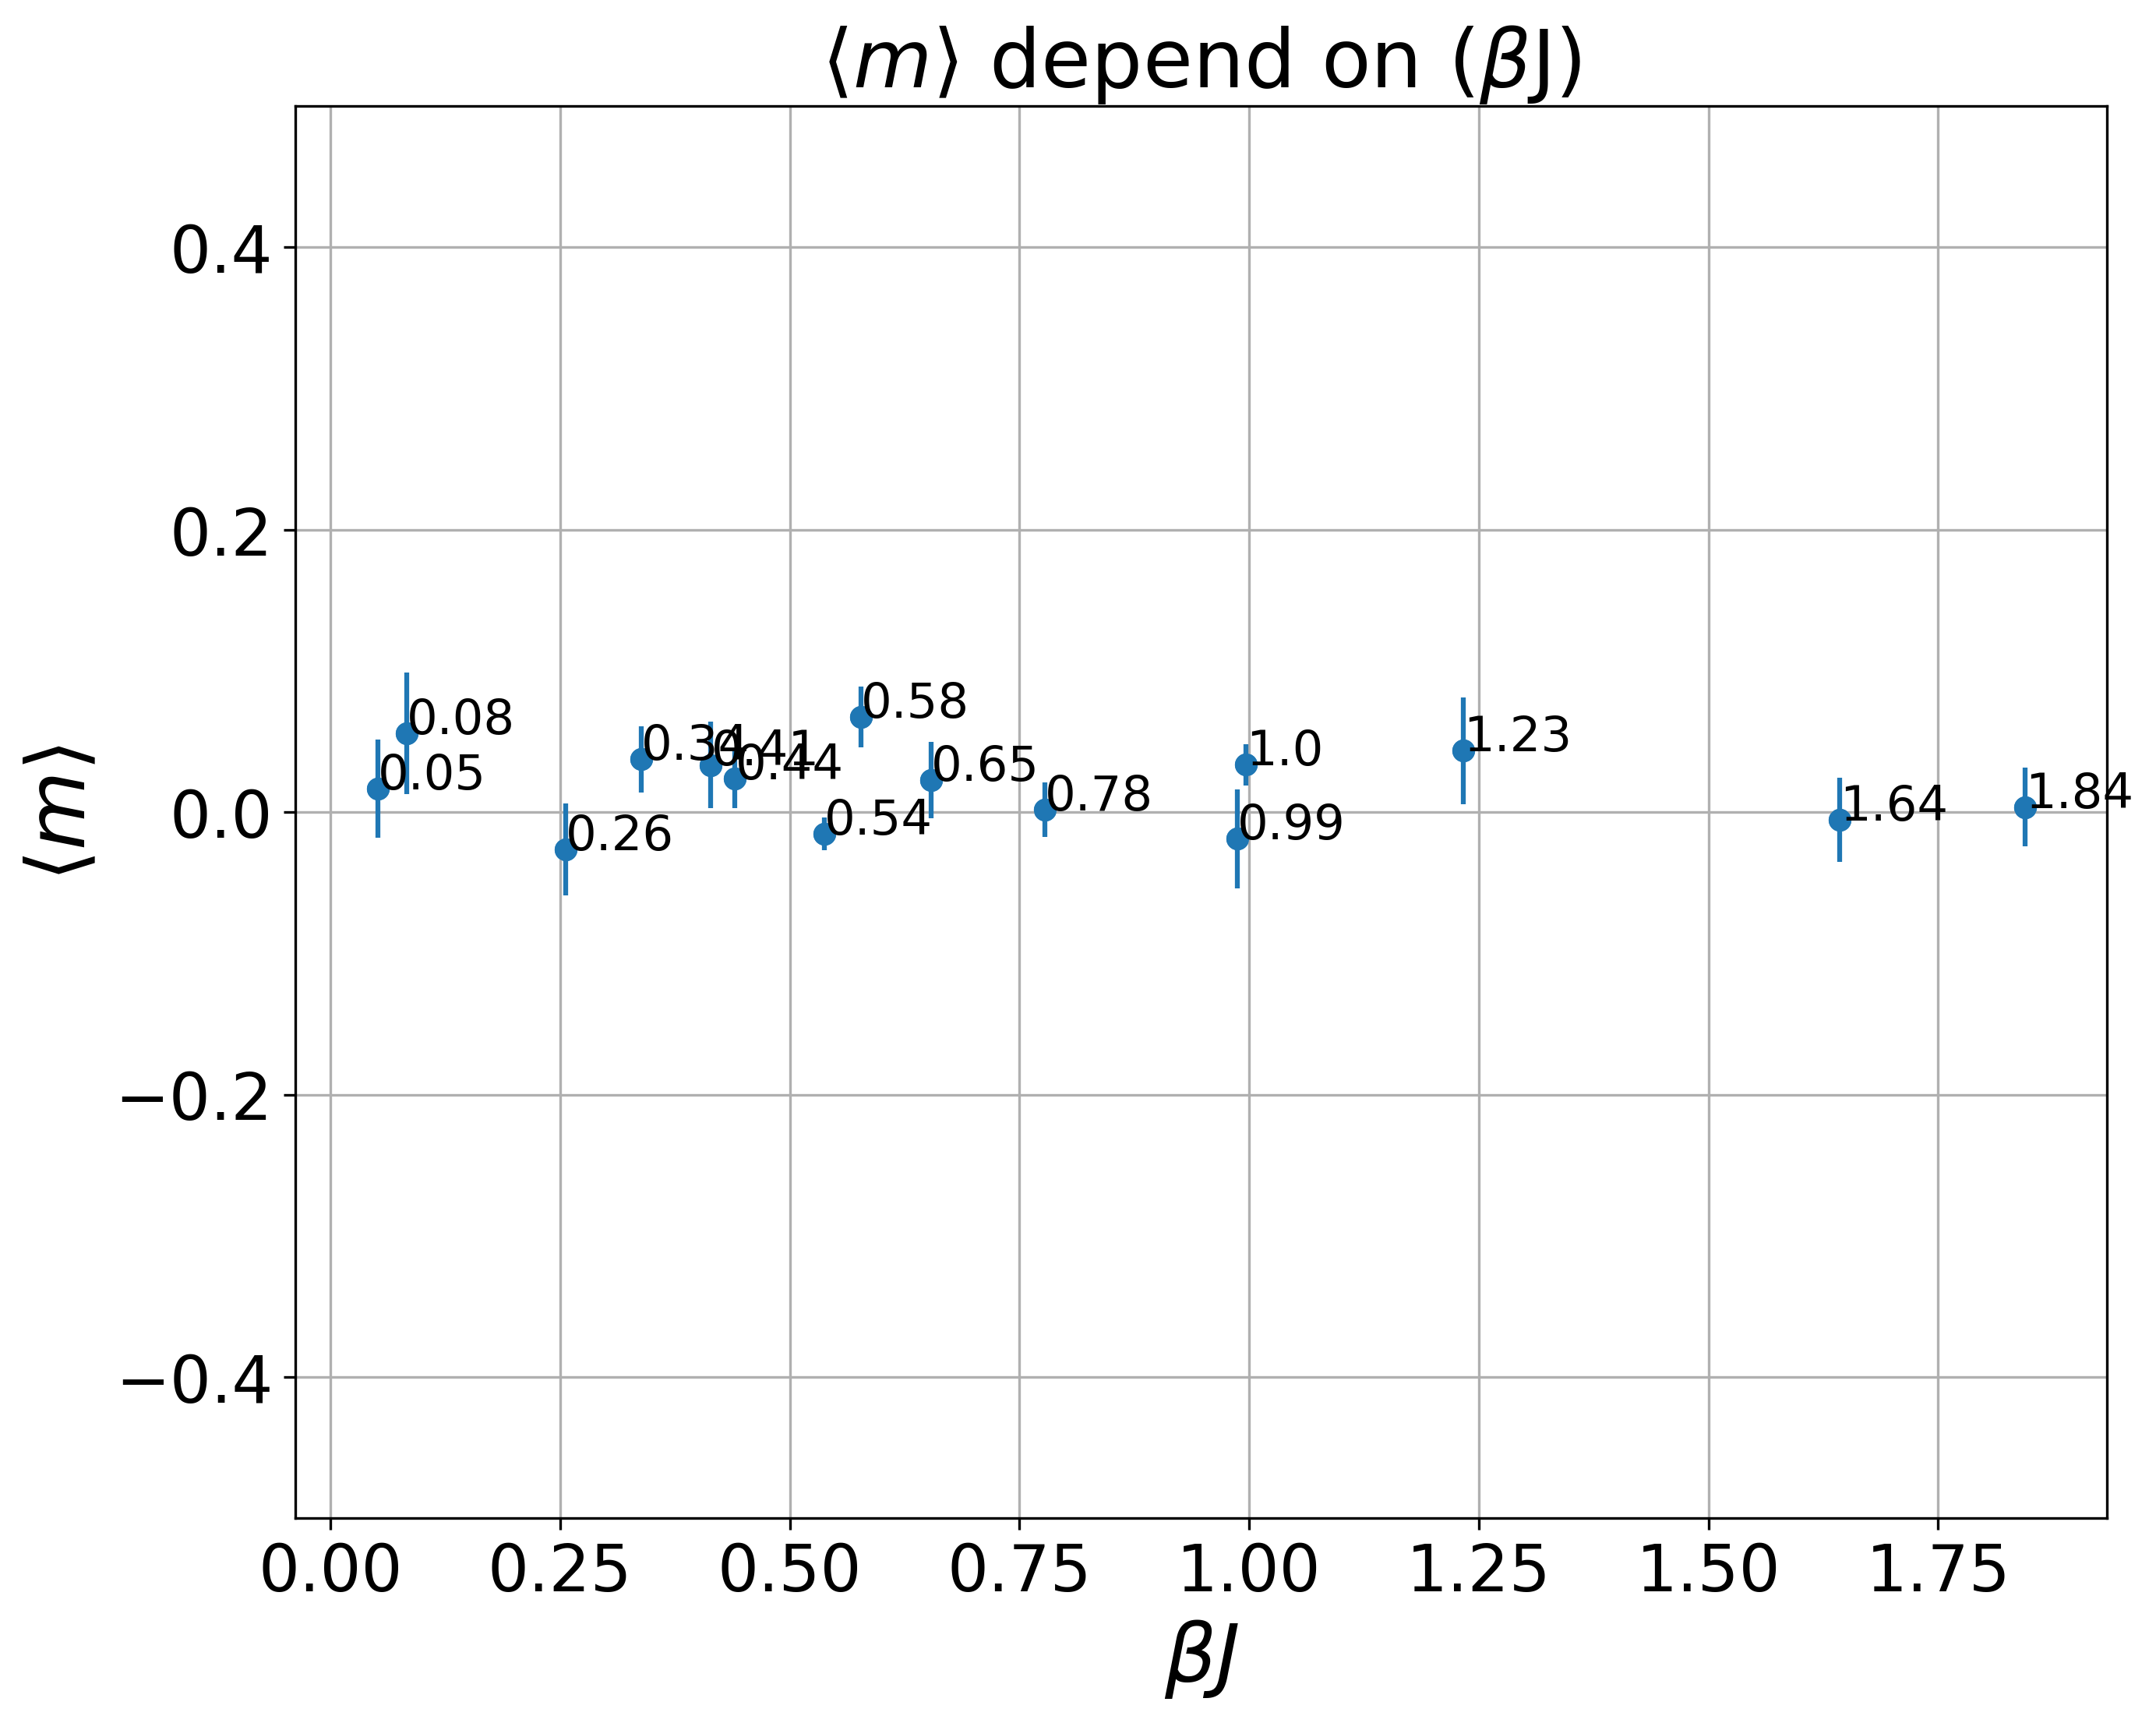

In [588]:
fig, ax = subplots(figsize=(10, 8), dpi=300, facecolor='w', edgecolor='r')
ax.scatter(BetaJ, mean_A_m)  

for i, txt in enumerate(BetaJ_n):
    ax.annotate(txt, (BetaJ[i], mean_A_m[i]), fontsize=15)
errorbar(BetaJ, mean_A_m,mean_A_m_std, linestyle='',marker='o')
xlabel(r'$\beta J$',fontsize=25)
ylabel(r'$\langle m \rangle$',fontsize=25)
grid(True)
title(r'$\langle m \rangle$ depend on ($\beta$J)', fontsize=25)
xticks(fontsize=20)
yticks(fontsize=20)
ylim(-0.5,0.5)
savefig('matlag_rand_350.png')

In [589]:
mean_D_m = []
mean_D_m_std = []
for i in range(0,4*len(BetaJ),4):
    mean_D_m.append(mean(mtrx[0+i:3+i,2]))
    mean_D_m_std.append(sem(mtrx[0+i:3+i,2]))

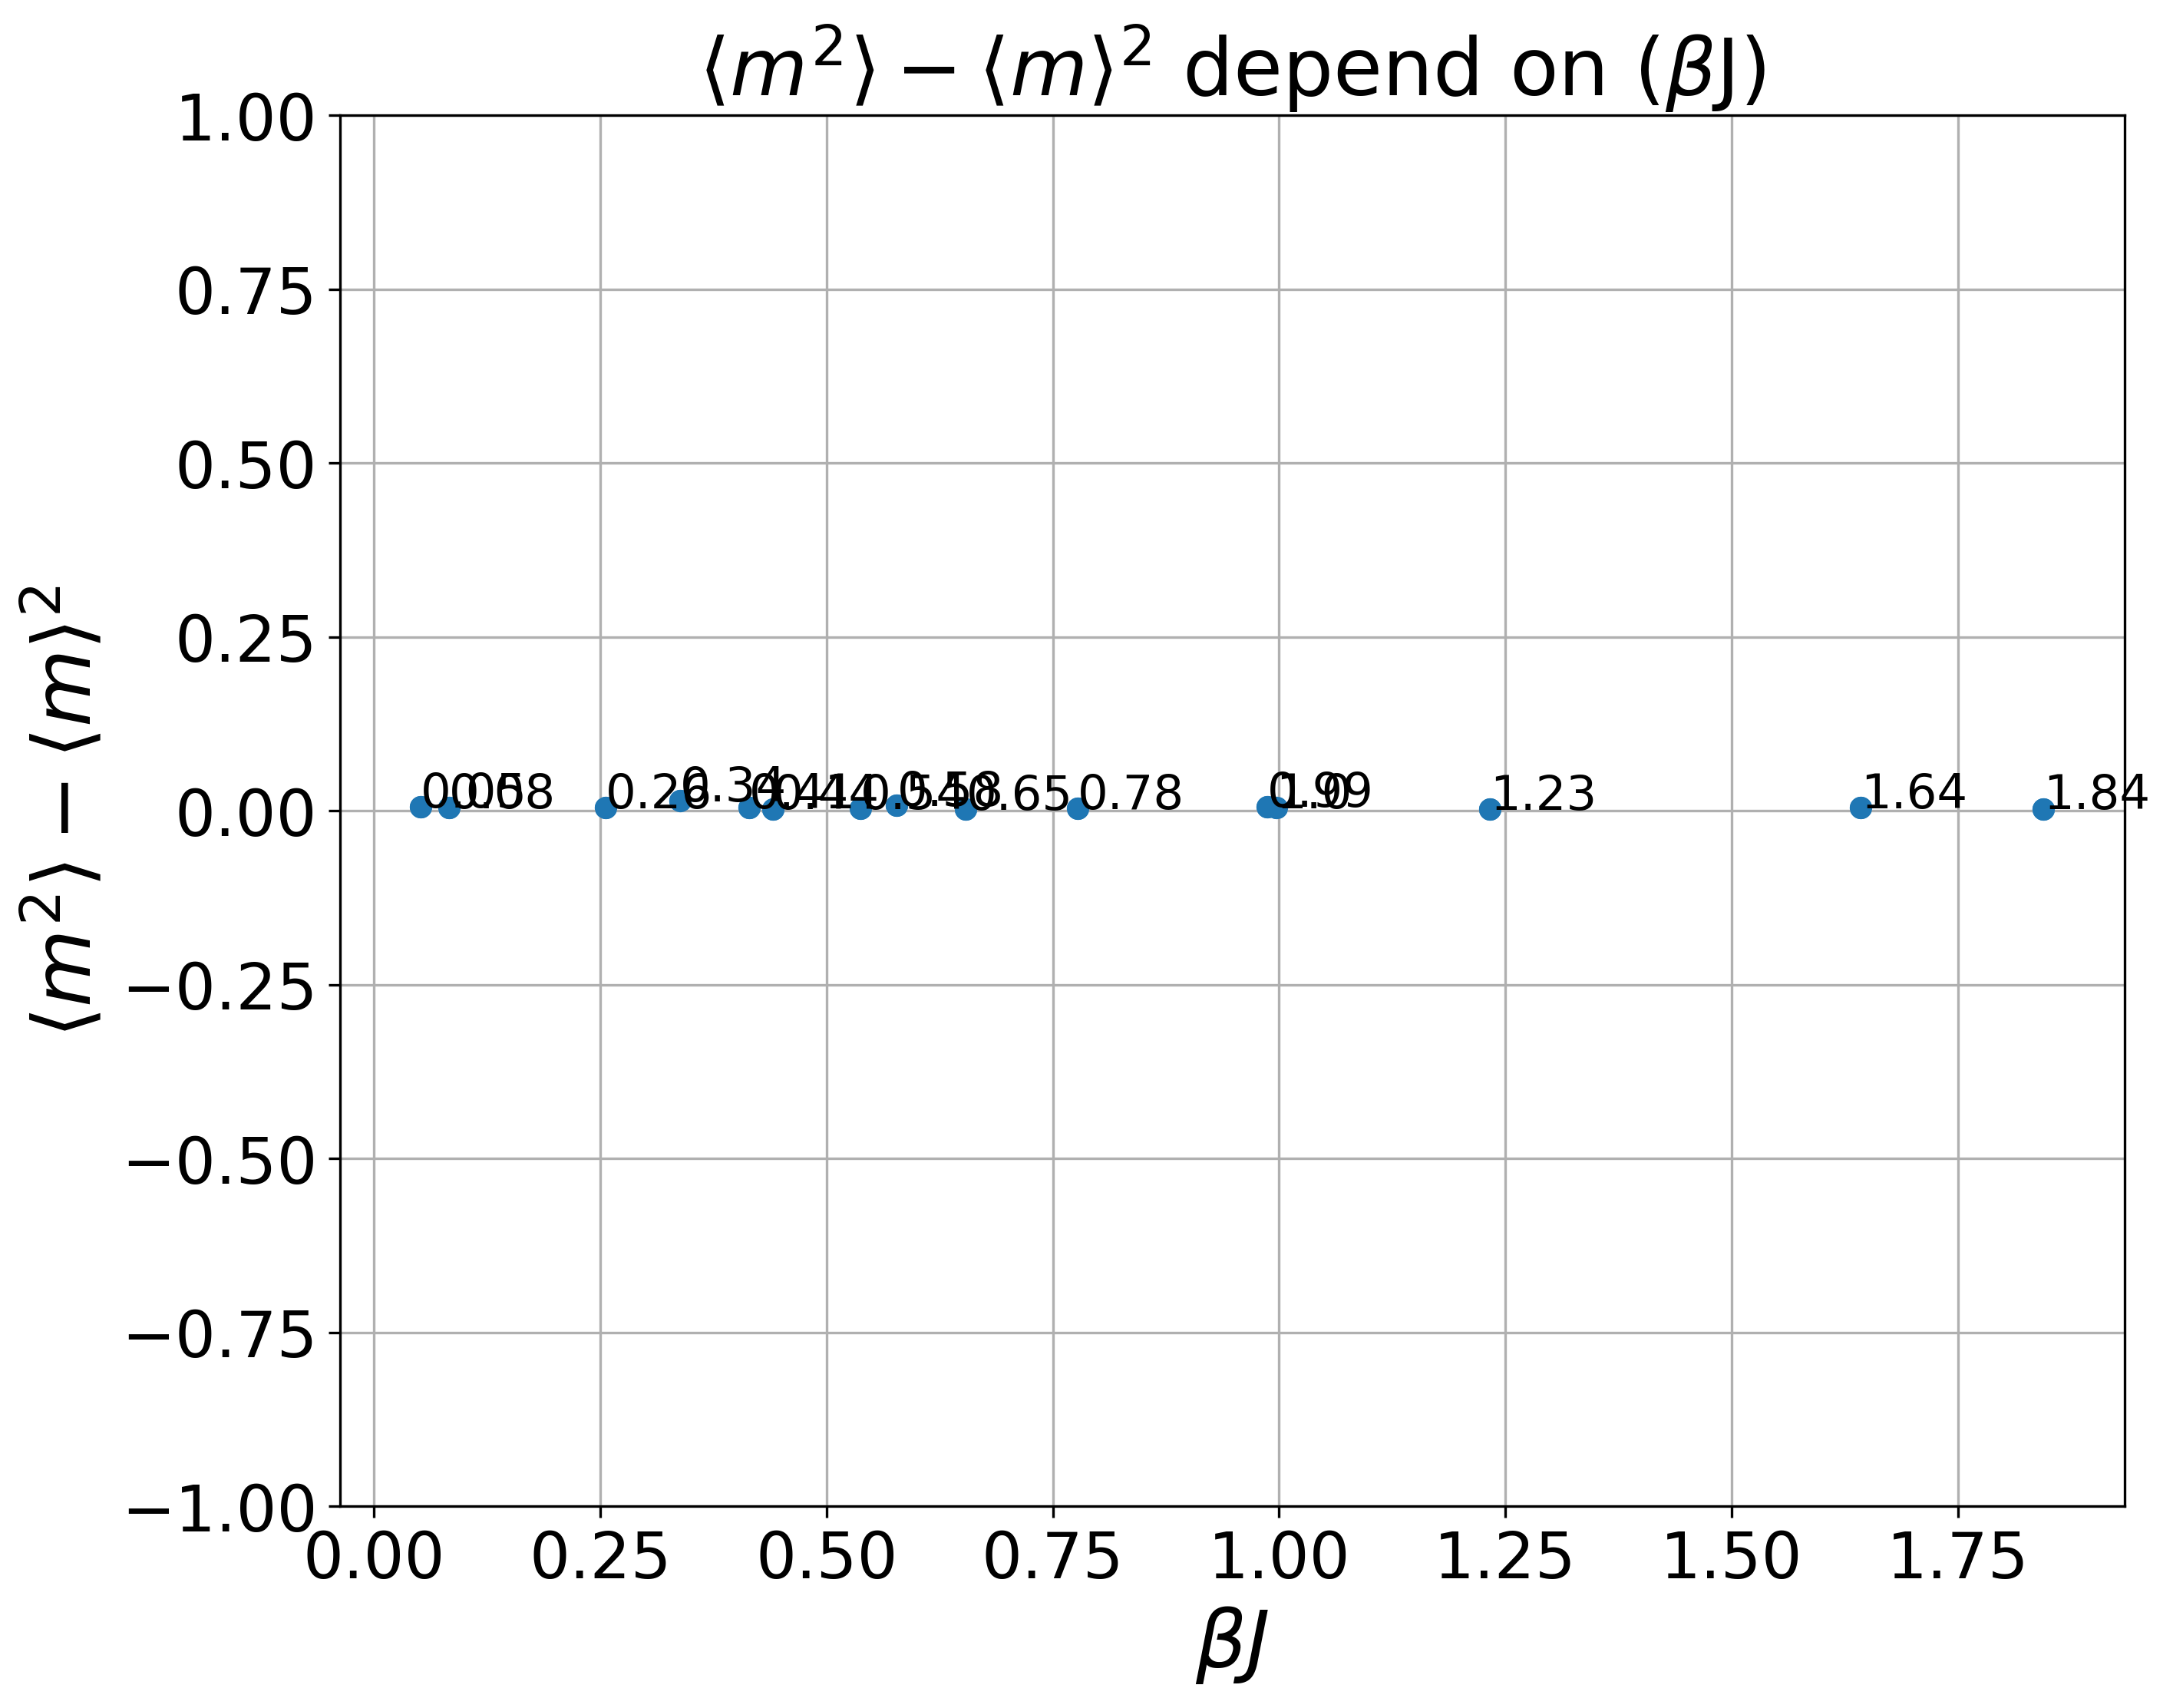

In [593]:
fig, ax = subplots(figsize=(10, 8), dpi=300, facecolor='w', edgecolor='r')
ax.scatter(BetaJ, mean_D_m)  

for i, txt in enumerate(BetaJ_n):
    ax.annotate(txt, (BetaJ[i], mean_D_m[i]), fontsize=15)
errorbar(BetaJ, mean_D_m, mean_D_m_std, linestyle='',marker='o')
xlabel(r'$\beta J$',fontsize=25)
ylabel(r'$\langle m^2 \rangle - \langle m \rangle ^2$',fontsize=25)
grid(True)
title(r'$\langle m^2 \rangle - \langle m \rangle ^2$ depend on ($\beta$J)', fontsize=25)
xticks(fontsize=20)
yticks(fontsize=20)
ylim(-1,1)
savefig('szorasnegyzet_rand_350.png')

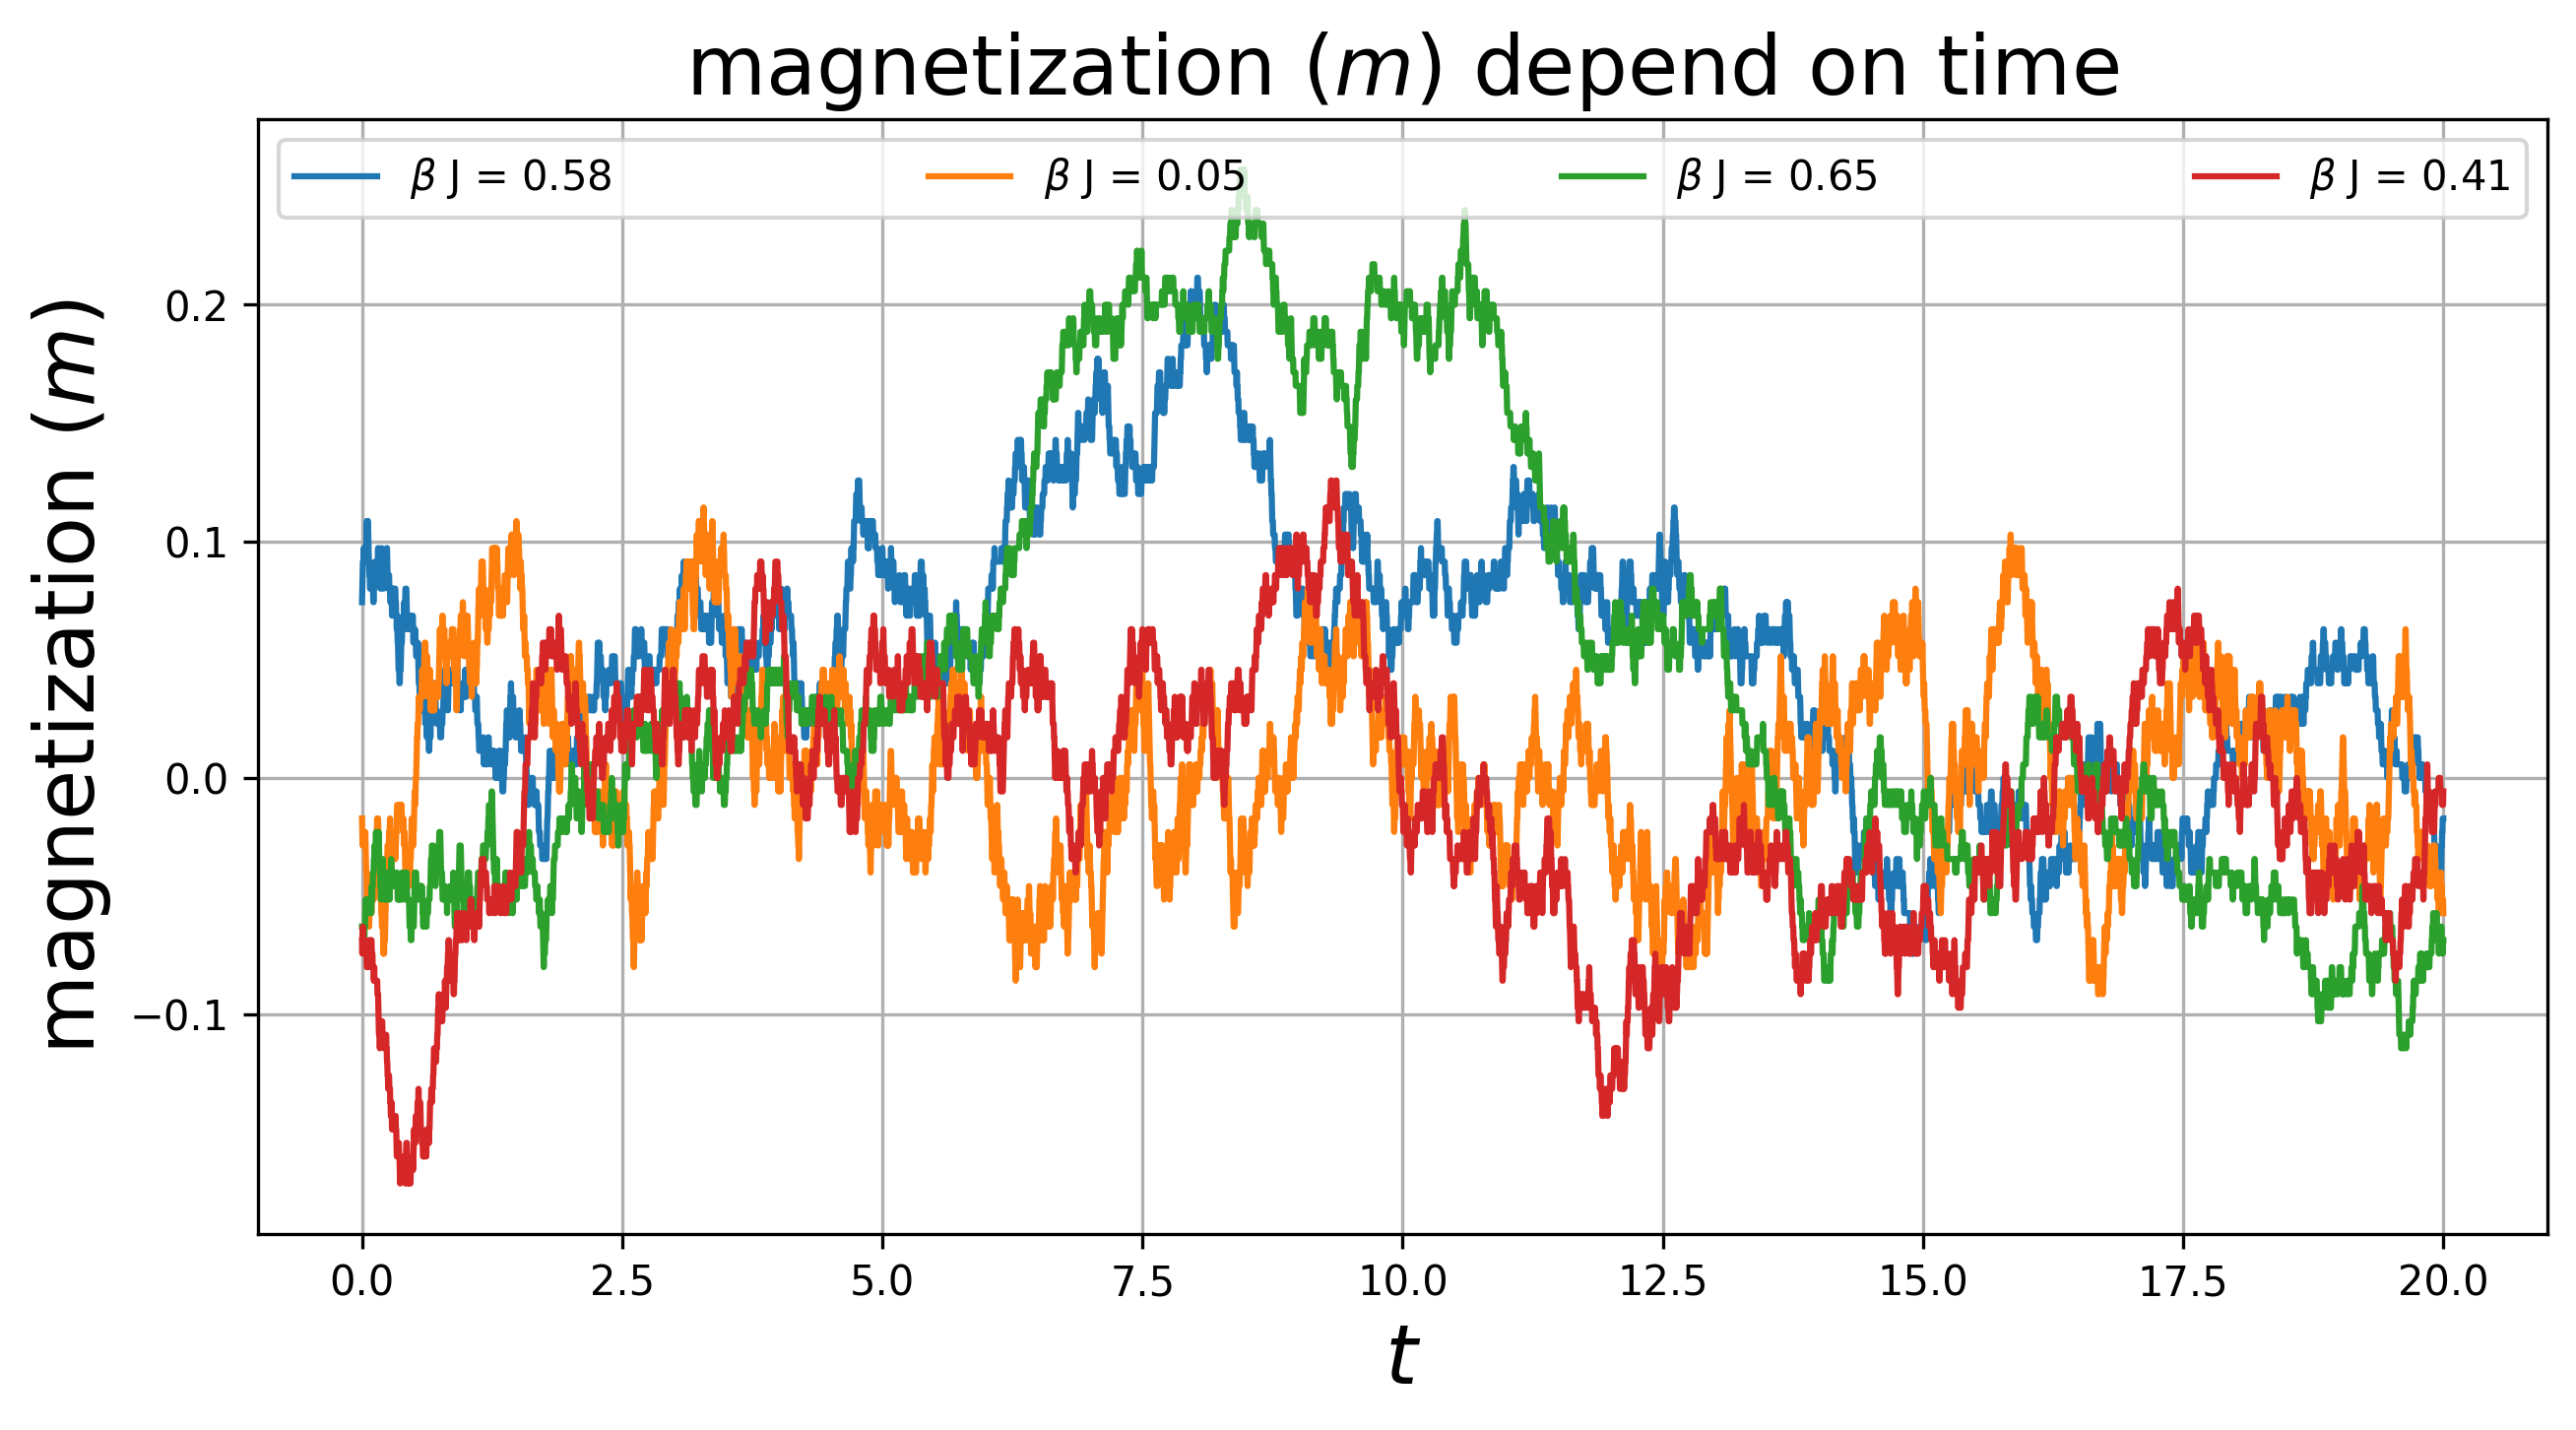

In [591]:
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='r')  
for i in range(4):
    plot( linspace(0,N*t, N*t)/N,m[i,:],label=r'$\beta$ J = %.2f' %BetaJ[i])

grid(True)
legend(fontsize=10, mode = "expand", ncol = 4)
xlabel(r'$t$',fontsize=20)
ylabel(r'magnetization '+'($m$)',fontsize=20)
title(r'magnetization ($m$) depend on time',fontsize=20)
savefig('magnet_random_350.png')

In [504]:
t = linspace(0,150,150*5)

In [505]:
result = []
for i in range(len(BetaJ)):
    result.append(round(1/2 * exp(2*BetaJ[i]),2))

In [506]:
result_m = np.empty((len(BetaJ),len(t)))

In [507]:
for i in range(len(BetaJ)):
    for j in range(len(t)):
        result_m[i,j] = (2*exp(-2*exp(-2*BetaJ[i])*t[j]))

(0.0, 20.0)

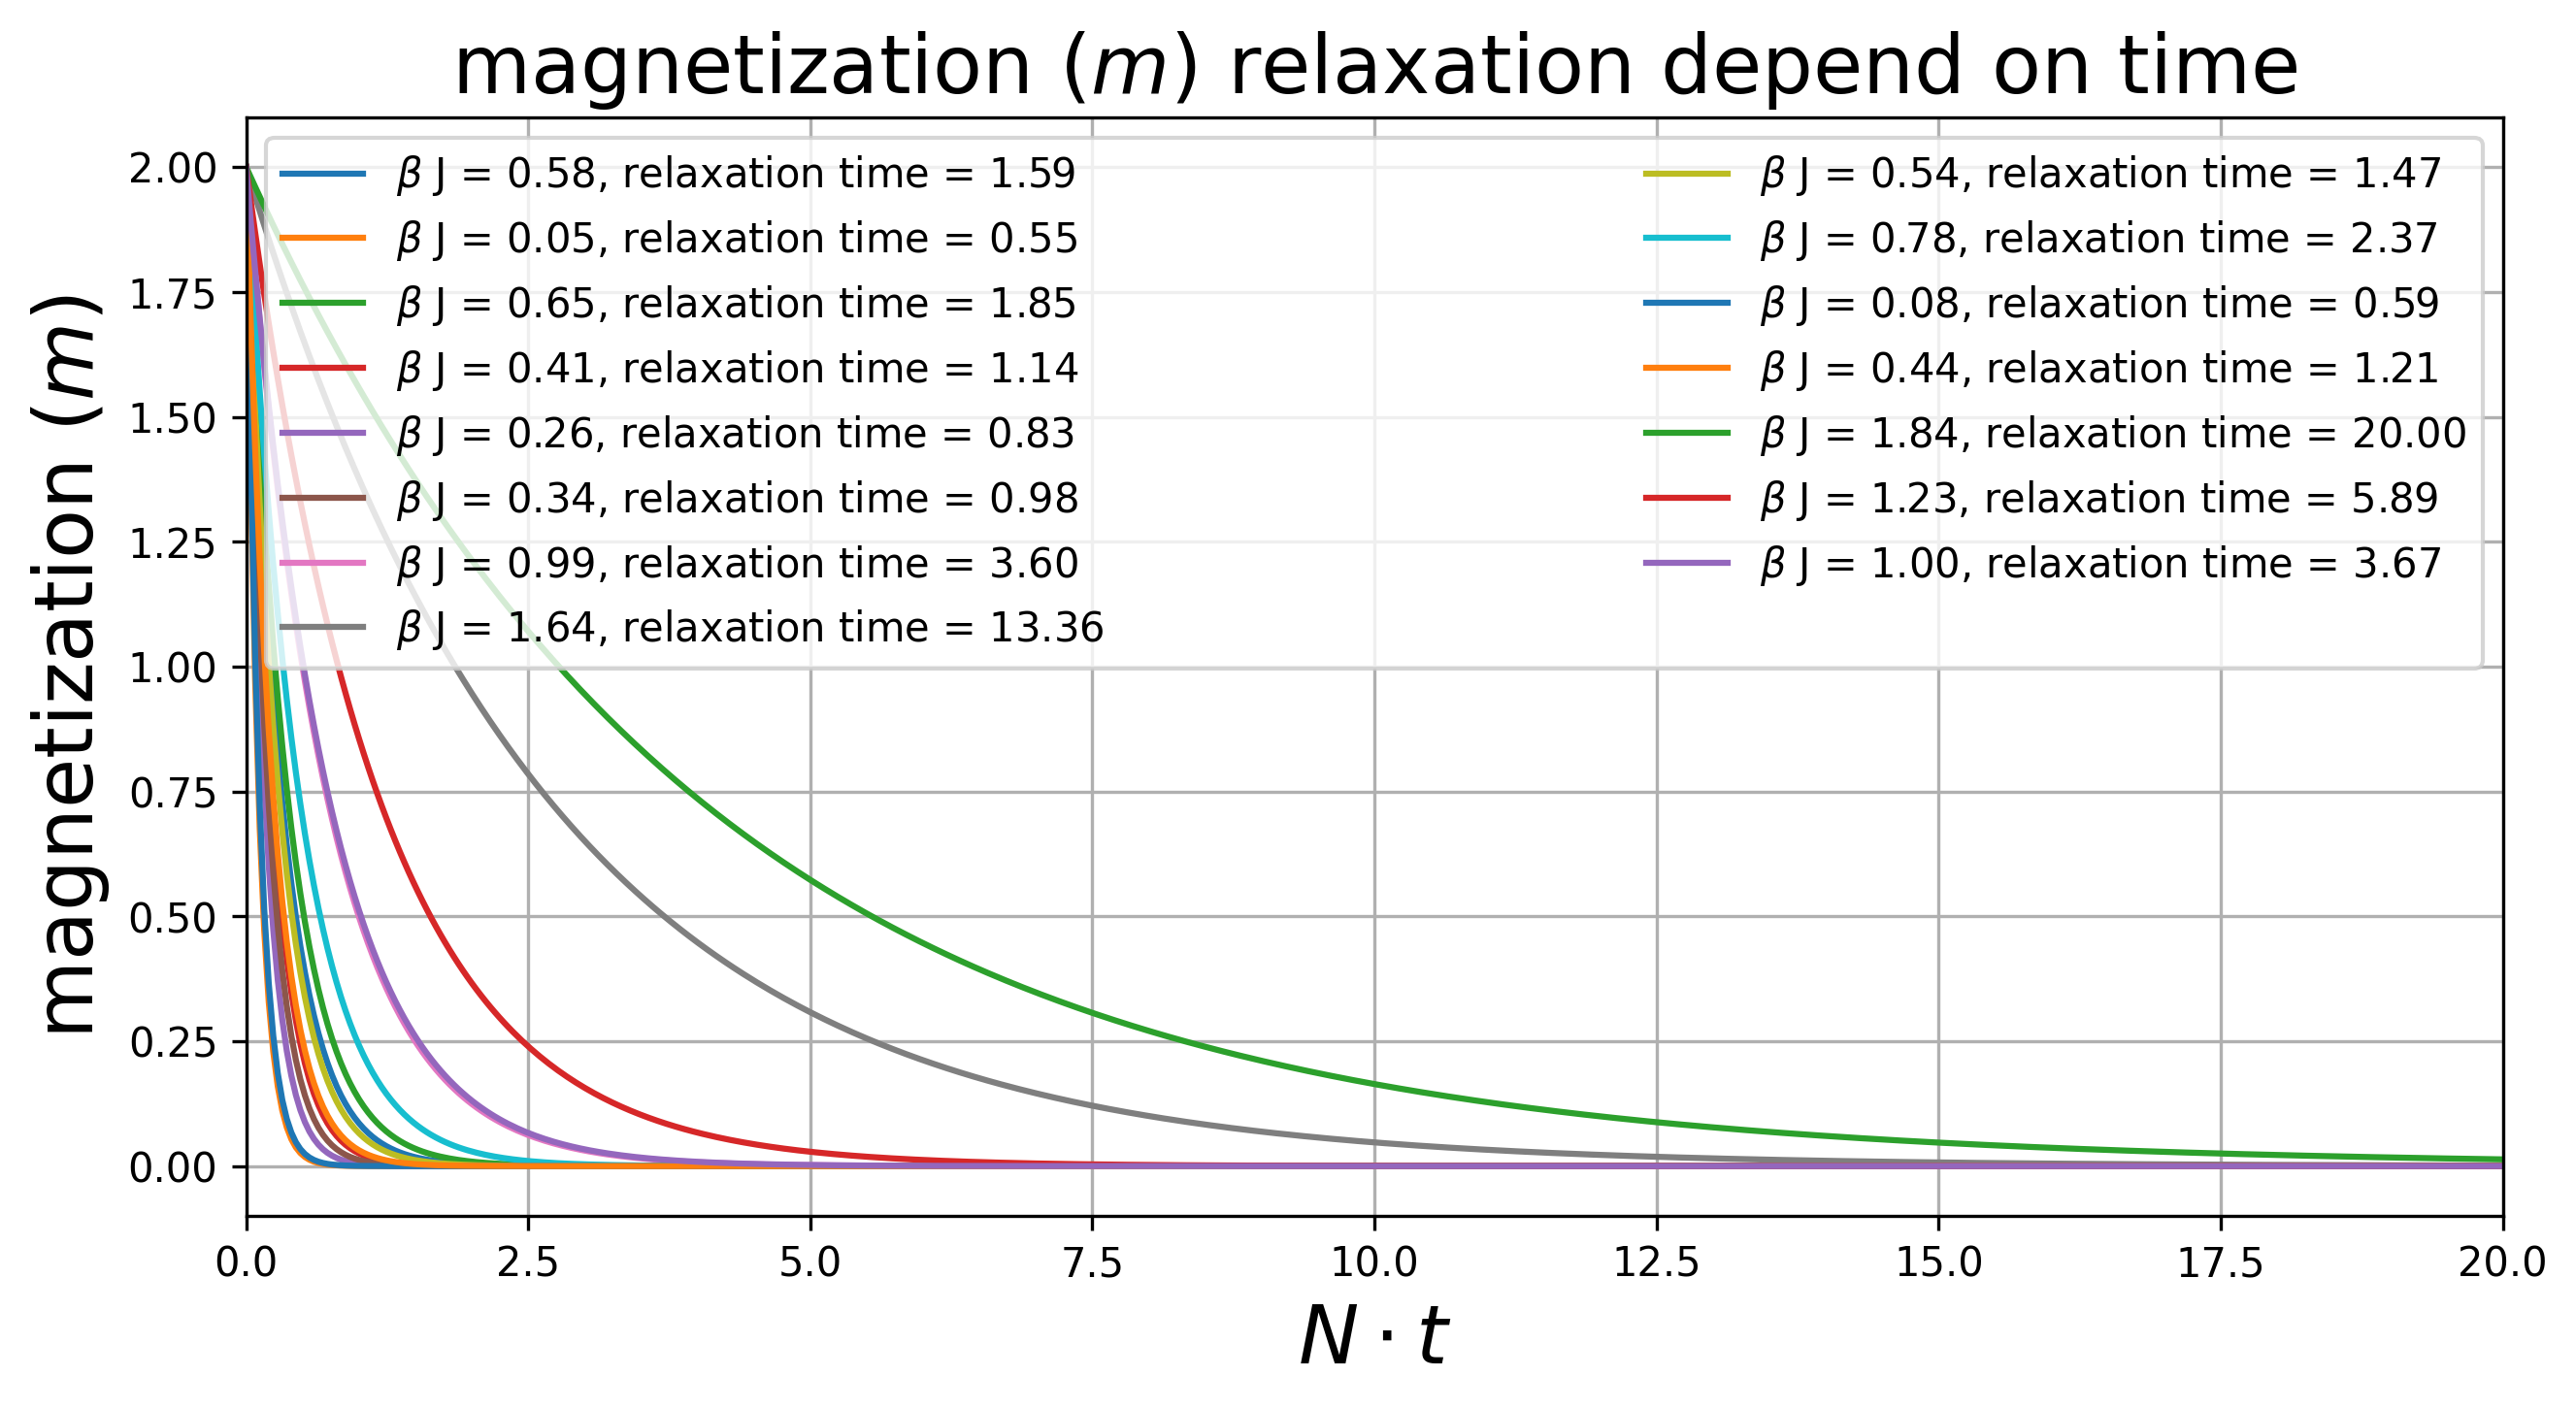

In [508]:
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='r')  
for i in range(0,len(BetaJ),1):
    plot((linspace(0,150,150*5))/5,result_m[i,:],label=r'$\beta$ J = %.2f' %BetaJ[i] + ", relaxation time = %.2f" %result[i])

grid(True)
#legend(fontsize=10, mode = "expand", ncol = 4)
legend(fontsize=10, mode = "expand", ncol = 2)
xlabel(r'$N\cdot t$',fontsize=20)
ylabel(r'magnetization '+'($m$)',fontsize=20)
title(r'magnetization ($m$) relaxation depend on time',fontsize=20)
xlim(0,20)
#savefig('magnet_t_rand.png')